# Regression
This notebook studies the use of knn regressor for analysis

### Importing standard liabraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading dataset 

In [2]:
from sklearn import datasets

In [3]:
california = datasets.fetch_california_housing()

In [4]:
type(california)

sklearn.utils.Bunch

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(california.DESCR[:975])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).



In [7]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

### Creating Dataframe 
This allows for readability and exploration with seaborn

In [8]:
features_df = pd.DataFrame(data = california.data, columns= california.feature_names)

In [9]:
target_df = pd.DataFrame(data = california.target,columns= ['class'])

df = pd.concat([features_df, target_df], axis=1)

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,class
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.shape

(20640, 9)

## Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=100)

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Exploration

In [19]:
california_arr = np.concatenate((X_train_scaled, y_train.reshape(-1,1)), axis=1)
california_pd = pd.DataFrame(california_arr, columns=[*california.feature_names, 'MEDV'])
california_pd.head().round(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,1.604,-0.843,0.974,-0.086,0.068,0.027,-0.865,0.883,2.903
1,-0.921,0.345,-0.197,-0.238,-0.472,-0.068,1.647,-0.999,0.687
2,-0.809,1.849,-0.376,-0.037,-0.516,-0.082,1.675,-0.741,1.097
3,0.597,-0.289,-0.437,-0.119,-0.680,-0.121,1.008,-1.423,4.600
4,0.219,0.107,0.187,0.122,-0.436,-0.057,0.956,-1.283,2.134


<AxesSubplot:>

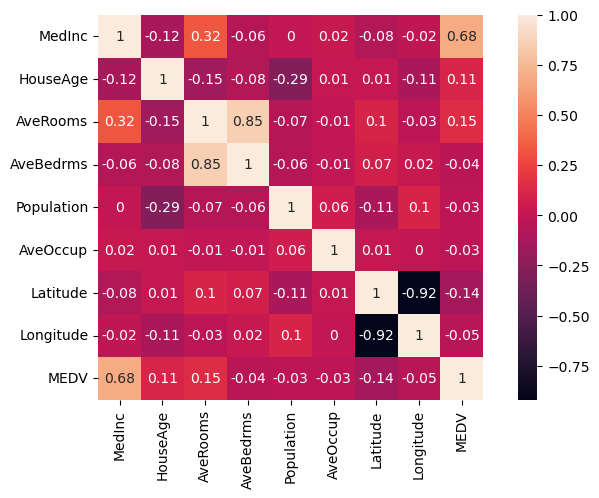

In [20]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(california_pd.corr().round(2), annot=True, square=True, ax=ax)


As it can be seen from the last row or the last column the features having correlations greater than 0.1 against MEDV are 
MedInc(0.68), HouseAge(0.11), AveRooms(0.15), Latitude(-0.14)

## Features Selection
Base on the correlation heatmap, the features to be selected are the following with their index:
MedInc - 0 ,HouseAge -1, AveRooms -2, Latitude -6

In [26]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [27]:
X_train_fs_scaled = X_train_scaled[:,[0,1,2,6]]
X_test_fs_scaled = X_test_scaled[:,[0,1,2,6]]

In [28]:
X_train_fs_scaled.shape

(15480, 4)

In [29]:
np.savez('california_train_fs_scaled', X = X_train_fs_scaled, y = y_train)
np.savez('california_test_fs_scaled', X = X_test_fs_scaled, y = y_test)

## Model Training and Evaluation

In [30]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [31]:
knn =  KNN(n_neighbors=50)
knn.fit(X_train_fs_scaled,y_train)

KNeighborsRegressor(n_neighbors=50)

In [32]:
y_test_predictions = knn.predict(X_test_fs_scaled)

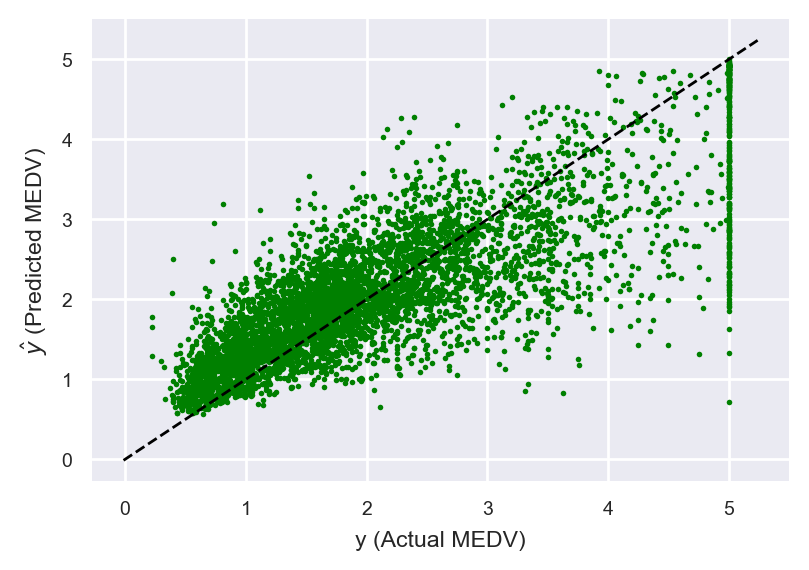

In [33]:
plt.style.use('seaborn')

plt.figure(figsize=(4.5, 3), dpi = 200)
plt.plot(y_test, y_test_predictions, 'g.', markersize=4)
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k', linewidth=1)
plt.xlabel("y (Actual MEDV)", fontsize='small')
plt.ylabel("$\hat{y}$ (Predicted MEDV)", fontsize='small')
plt.tick_params(axis='both', labelsize=7)

In [34]:
print('The test R^2 is: {:.2f}'.format(knn.score(X_test_fs_scaled, y_test)))

The test R^2 is: 0.63
